In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation


# Part 1
Some constants

In [10]:
charge = -1.9e-10 # coulombs
initial_vx = 20 # m/s
initial_vy = 0 # m/s
droplet_diameter = 84e-6 # Meteres
droplet_density = 1000 # kg/m^3
droplet_mass = ( (4/3) * (droplet_diameter/2) ** 3) * math.pi * droplet_density
print_resolution = 300 # dpi
total_distance_travel = 0.003 # Meters
plate_voltage = 0 # Volts, for part 1
plate_seperation = 0.001 # Meters
plate_start = 0.00125 # Position, Meters
plate_length = 0.0005 # Meteres
plate_end = plate_start + plate_length # Position, Meters
initial_x = 0 # Position, Meters
initial_y = 0.10795 # Position, Meters
gravity_const = -9.8 # m/s^2

## Calculations For Question 1
We are assuming no voltage is applied to the plates. <br>
We are looking for how long it takes for the droplet to reach the paper. <br>
Due to the droplet being so small, we can negate air resistance. Therefore, the velocity will remain constant for both X and Y, for this case. <br>

In [11]:
time_step = 1e-6
sim_time = 2e-4
num_steps = math.ceil(sim_time/time_step)

droplet = ({'position_x': np.zeros(num_steps), 'position_y': np.zeros(num_steps),
                'velocity_x': np.zeros(num_steps), 'velocity_y': np.zeros(num_steps),
                'time': np.zeros(num_steps), 'combined_velocity': np.zeros(num_steps)})
electric_field = plate_voltage / plate_seperation # Should be zero in this case, due to no plate voltage

previous_vy = initial_vy
previous_px = initial_x
previous_py = initial_y

grav_force = gravity_const * droplet_mass # Gravitational force, which is always constant
for step in range(0, num_steps):
    droplet['time'][step] = time_step * step
    droplet['velocity_x'][step] += initial_vx
    if (previous_px < plate_start or previous_px > plate_end): # Checks if the droplet is within the plates
        force_y = 0
    else: # If it is between the plates
        force_y = electric_field * charge # This should be zero in this case, due to there being no electric field between the plates
        droplet['velocity_y'][step] += ( (force_y * time_step) / droplet_mass) + previous_vy + grav_force
    droplet['combined_velocity'][step] += math.sqrt( (droplet['velocity_x'][step] ** 2) + (droplet['velocity_y'][step] ** 2) )
    droplet['position_y'][step] += (droplet['velocity_y'][step] * time_step) + previous_py
    droplet['position_x'][step] += (droplet['velocity_x'][step] * time_step) + previous_px
    print("Combined",droplet['combined_velocity'][step])
    print("y",droplet['velocity_y'][step])
    previous_vy = droplet['velocity_y'][step]
    previous_py = droplet['position_y'][step]
    previous_px = droplet['position_x'][step]

Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0
Combined 20.0
y 0.0


## Plotting Question 1

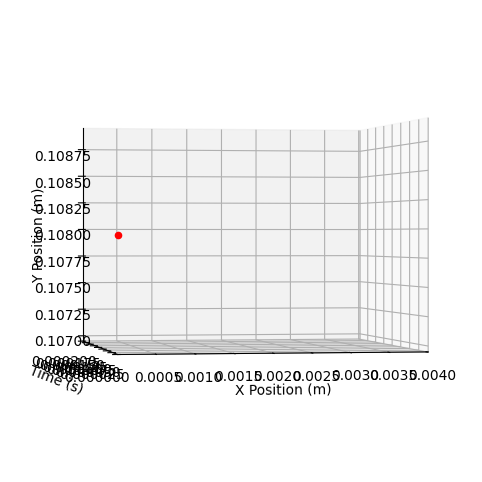

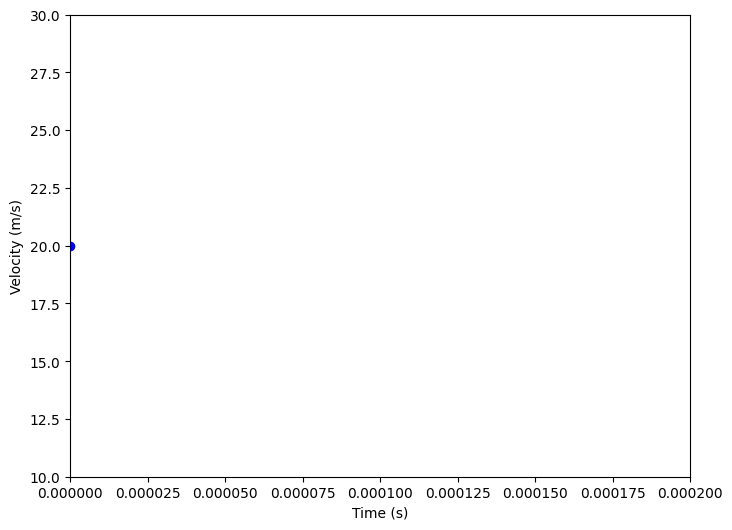

In [12]:
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.set_xlabel('X Position (m)')
ax1.set_ylabel('Time (s)')
ax1.set_zlabel('Y Position (m)')
ax1.set_zlim(np.min(droplet['position_y']) - 0.001, np.max(droplet['position_y']) + 0.001)
ax1.set_xlim(np.min(droplet['position_x']), np.max(droplet['position_x']))
ax1.set_ylim(np.min(droplet['time']), np.max(droplet['time']))
ax1.view_init(elev=0, azim=-100)


fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111)
ax2.set_ylabel('Velocity (m/s)')
ax2.set_xlabel('Time (s)')
ax2.set_ylim(np.min(droplet['combined_velocity']) - 10 , np.max(droplet['combined_velocity']) + 10)
ax2.set_xlim(np.min(droplet['time']), np.max(droplet['time']))

dot1 = ax1.scatter([], [], [], color='r', label='Position')
dot2 = ax2.scatter([], [], color='b', label='Velocity')

def update_position(frame):
    dot1._offsets3d = (droplet['position_x'][frame:frame+1], droplet['time'][frame:frame+1], droplet['position_y'][frame:frame+1])
    return dot1,

def update_velocity(frame):
    dot2.set_offsets(np.c_[droplet['time'][frame:frame+1], droplet['combined_velocity'][frame:frame+1]])
    return dot2,

ani1 = animation.FuncAnimation(fig1, update_position, frames=num_steps, interval=10, blit=True)
ani2 = animation.FuncAnimation(fig2, update_velocity, frames=num_steps, interval=10, blit=True)


plt.show()
ani1.save("movie1.mp4", writer='ffmpeg', fps=60)
ani2.save("movie2.mp4", writer='ffmpeg', fps=60)
